/home/ayush/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


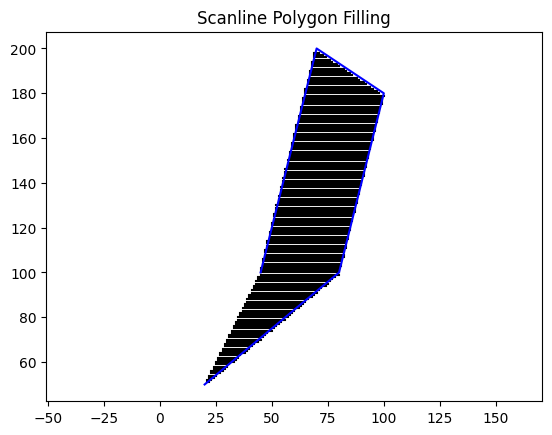

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Edge:
    def __init__(self, ymin, ymax, xofymin, slopeinverse):
        self.ymin = ymin
        self.ymax = ymax
        self.xofymin = xofymin
        self.slopeinverse = slopeinverse

def add_edge(edges, x1, y1, x2, y2):
    if y2 < y1:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
    if y1 != y2:
        slopeinverse = (x2 - x1) / (y2 - y1)
    else:
        slopeinverse = 0
    edges[y1].append(Edge(y1, y2, x1, slopeinverse))

def scanline_fill(polygon):
    ymin = polygon[:,1].min()
    ymax = polygon[:,1].max()
    edges = [[] for _ in range(ymax + 1)]
    for i in range(len(polygon)):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % len(polygon)]
        add_edge(edges, x1, y1, x2, y2)
    scanline_fill_helper(edges, ymin, ymax)

def scanline_fill_helper(edges, ymin, ymax):
    active_edges = []
    for y in range(ymin, ymax + 1):
        for edge in edges[y]:
            active_edges.append(edge)
        active_edges.sort(key=lambda x: x.xofymin)
        for edge in active_edges:
            edge.xofymin += edge.slopeinverse
        active_edges = [edge for edge in active_edges if edge.ymax != y]
        for i in range(0, len(active_edges), 2):
            x1 = int(active_edges[i].xofymin)
            x2 = int(active_edges[i + 1].xofymin)
            plt.plot(range(x1, x2 + 1), [y] * (x2 - x1 + 1), color='black')








# Example usage:
polygon = np.array([[20, 50], [80, 100], [100, 180], [70, 200], [45, 100]])
scanline_fill(polygon)
plt.plot(polygon[:,0], polygon[:,1], color='blue')
plt.title('Scanline Polygon Filling')
plt.axis('equal')
plt.show()